# Document Classification with CNN [Part 1] - Preprocessing v1.0

* Solved By: Pradip Dharam
* Objective: Preprocess docs, train multiple ConvNets to classify docs with achieve upto 70% accuracy etc.
* Part 1 [Covered]: Preprocessing of all 18828 files. Features preprocessed_email, preprocessed_subjects, preprocessed_texts to be extracted.
* Part 2 [Not Covered]: Multiple ConvNets models to be trained.
* Part 3 [Not Covered]: 

In [1]:
import pandas as pd
import numpy as np
import re
import os
import random
import matplotlib.pyplot as plt
from tqdm import tqdm
import string
from collections import Counter
import spacy
from spacy import displacy

In [2]:
import nltk
from nltk.stem import WordNetLemmatizer
import nltk
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords

In [3]:
#nltk.download('stopwords')
#nltk.download('wordnet')
#!pip install spacy
#!python -m spacy download en_core_web_sm

## Problem Statement

* There are total 18828 documents (text files) and those belongs to 20 different types
* File name contains the label. The string before _
* Specific document to be classified in to one of the class

## Exploring Source Data

### Dataset

https://drive.google.com/file/d/1rxD15nyeIPIAZ-J2VYPrDRZI66-TBWvM/view?pli=1

### Number of documents, class labels and number of documents per label

In [4]:
doc_names = os.listdir("./documents")
print("Number of documents are", len(doc_names))

Number of documents are 18828


In [5]:
#Temporary testing
#doc_names = doc_names[0:100]

In [6]:
class_labels = [s.split('_')[0] for s in doc_names]

In [7]:
dict_class_counts = dict(Counter(class_labels))

Class labels

In [8]:
class_document_counts = pd.Series(dict_class_counts)
class_document_counts

alt.atheism                 799
comp.graphics               973
comp.os.ms-windows.misc     985
comp.sys.ibm.pc.hardware    982
comp.sys.mac.hardware       961
comp.windows.x              980
misc.forsale                972
rec.autos                   990
rec.motorcycles             994
rec.sport.baseball          994
rec.sport.hockey            999
sci.crypt                   991
sci.electronics             981
sci.med                     990
sci.space                   987
soc.religion.christian      997
talk.politics.guns          910
talk.politics.mideast       940
talk.politics.misc          775
talk.religion.misc          628
dtype: int64

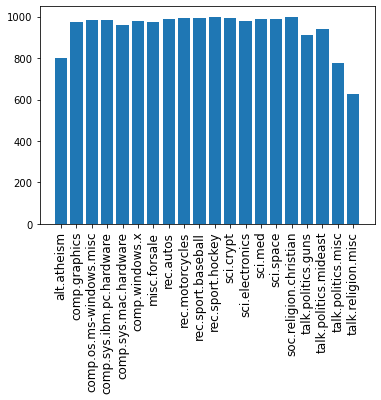

In [9]:
#https://stackoverflow.com/questions/29525120/pandas-creating-a-histogram-from-string-counts
plt.bar(range(len(class_document_counts)), \
        class_document_counts.values, align='center')
plt.xticks(range(len(class_document_counts)), \
           class_document_counts.index.values, size='large', rotation='vertical')
plt.show()

### Sample documents

In [10]:
doc_names[0:4]

['alt.atheism_49960.txt',
 'alt.atheism_51060.txt',
 'alt.atheism_51119.txt',
 'alt.atheism_51120.txt']

Sample 1

In [11]:
with open('./documents/alt.atheism_49960.txt') as f:
    lines = f.readlines()

for i in lines:
    print(i)

From: mathew <mathew@mantis.co.uk>

Subject: Alt.Atheism FAQ: Atheist Resources



Archive-name: atheism/resources

Alt-atheism-archive-name: resources

Last-modified: 11 December 1992

Version: 1.0



                              Atheist Resources



                      Addresses of Atheist Organizations



                                     USA



FREEDOM FROM RELIGION FOUNDATION



Darwin fish bumper stickers and assorted other atheist paraphernalia are

available from the Freedom From Religion Foundation in the US.



Write to:  FFRF, P.O. Box 750, Madison, WI 53701.

Telephone: (608) 256-8900



EVOLUTION DESIGNS



Evolution Designs sell the "Darwin fish".  It's a fish symbol, like the ones

Christians stick on their cars, but with feet and the word "Darwin" written

inside.  The deluxe moulded 3D plastic fish is $4.95 postpaid in the US.



Write to:  Evolution Designs, 7119 Laurel Canyon #4, North Hollywood,

           CA 91605.



People in the San Francisco Bay area can

Sample 2

In [12]:
with open('./documents/alt.atheism_51060.txt') as f:
    lines = f.readlines()

for i in lines:
    print(i)

From: mathew <mathew@mantis.co.uk>

Subject: Alt.Atheism FAQ: Introduction to Atheism



Archive-name: atheism/introduction

Alt-atheism-archive-name: introduction

Last-modified: 5 April 1993

Version: 1.2



-----BEGIN PGP SIGNED MESSAGE-----



                          An Introduction to Atheism

                       by mathew <mathew@mantis.co.uk>



This article attempts to provide a general introduction to atheism.  Whilst I

have tried to be as neutral as possible regarding contentious issues, you

should always remember that this document represents only one viewpoint.  I

would encourage you to read widely and draw your own conclusions; some

relevant books are listed in a companion article.



To provide a sense of cohesion and progression, I have presented this article

as an imaginary conversation between an atheist and a theist.  All the

questions asked by the imaginary theist are questions which have been cropped

up repeatedly on alt.atheism since the newsgroup was c

Sample 3

In [13]:
with open('./documents/alt.atheism_51119.txt') as f:
    lines = f.readlines()

for i in lines:
    print(i)

From: I3150101@dbstu1.rz.tu-bs.de (Benedikt Rosenau)

Subject: Re: Gospel Dating



In article <65974@mimsy.umd.edu>

mangoe@cs.umd.edu (Charley Wingate) writes:

 

>>Well, John has a quite different, not necessarily more elaborated theology.

>>There is some evidence that he must have known Luke, and that the content

>>of Q was known to him, but not in a 'canonized' form.

>

>This is a new argument to me.  Could you elaborate a little?

>

 

The argument goes as follows: Q-oid quotes appear in John, but not in

the almost codified way they were in Matthew or Luke. However, they are

considered to be similar enough to point to knowledge of Q as such, and

not an entirely different source.

 

 

>>Assuming that he knew Luke would obviously put him after Luke, and would

>>give evidence for the latter assumption.

>

>I don't think this follows.  If you take the most traditional attributions,

>then Luke might have known John, but John is an elder figure in either case.

>We're talk

Sample 4

In [14]:
with open('./documents/alt.atheism_51120.txt') as f:
    lines = f.readlines()

for i in lines:
    print(i)

From: mathew <mathew@mantis.co.uk>

Subject: Re: university violating separation of church/state?



dmn@kepler.unh.edu (...until kings become philosophers or philosophers become kings) writes:

>      Recently, RAs have been ordered (and none have resisted or cared about

> it apparently) to post a religious flyer entitled _The Soul Scroll: Thoughts

> on religion, spirituality, and matters of the soul_ on the inside of bathroom

> stall doors. (at my school, the University of New Hampshire) It is some sort

> of newsletter assembled by a Hall Director somewhere on campus. It poses a

> question about 'spirituality' each issue, and solicits responses to be 

> included in the next 'issue.' It's all pretty vague. I assume it's put out

> by a Christian, but they're very careful not to mention Jesus or the bible.

> I've heard someone defend it, saying "Well it doesn't support any one religion.

> " So what??? This is a STATE university, and as a strong supporter of the

> separation of

## Preprocessing 

### Extract original text feature with exact data in the source files

In [15]:
def get_text_from_file(file):
    with open(file) as f:
        lines = f.readlines()

    doc = ""
    for i in lines:
        doc = doc + i
    return doc

In [16]:
def get_text_from_all_files(files_list):
    text_list = []
    for file in tqdm(files_list):
        text = get_text_from_file(file)
        text_list.append(text)
    return text_list

In [17]:
original_texts = get_text_from_all_files(['./documents/' + x for x in doc_names])

100%|███████████████████████████████████████████████████████████████████████████| 18828/18828 [01:17<00:00, 242.58it/s]


In [18]:
len(original_texts)

18828

In [19]:
original_texts[100:101]

['From: stank@cbnewsl.cb.att.com (Stan Krieger)\nSubject: Re: [soc.motss, et al.] "Princeton axes matching funds for Boy Scouts"\n\nstudent writes:\n\n>Somewhere, roger colin shouse writes about "radical gay dogma."  Somewhere else\n>he claims not to claim to have a claim to knowing those he doesn\'t know.\n>There are at least twenty instances of this kind of muddleheaded fourth-\n>reich-sophistique shit in his postings.  Maybe more.  In fact I\'m not sure\n>the instances could be counted, because they reproduce like a virus the more\n>you consider his words.\n>\tMy question is this: what is the best response to weasels like\n>shouse and Stan Krieger?  Possibilities:\n>\t(a) study them dispassionately and figure out how they work, then\n>(1) remember what you\'ve learned so as to combat them when they or their clones\n>get into office\n>(2) contribute your insights to your favorite abnormal psych ward\n>\t(b) learn to overcome your repugnance for serial murder\n\nThis posting is totall

### Preprocessing emails and creating respective feature

#### Function for lemmatizaion, stemming and stop words removal

In [20]:
#Creating function for lemmatization, spemming and stopwords removal
keep_words = ['after', 'before', 'not', 'now', 'only', 'same']
#Skipping words which has symantic meaning
stop_words = set(stopwords.words("english")) - set(keep_words)

lemmatizer = WordNetLemmatizer()
word_stemmer = PorterStemmer()

def perform_lemm_stem_stopremoval(doc):
    lemma_stem_list = []
    for token in doc.split():
        token = lemmatizer.lemmatize(token)
        token = word_stemmer.stem(token)
        if token not in stop_words:  
            lemma_stem_list.append( token )
    doc = ' '.join(lemma_stem_list)
    return doc

perform_lemm_stem_stopremoval("Removing words or scentences between tags")

'remov word scentenc tag'

In [21]:
perform_lemm_stem_stopremoval("New_York")

'new_york'

#### Preprocessing emails in one document first

In [22]:
with open('./documents/alt.atheism_51120.txt') as f:
    lines = f.readlines()

document = ""
for i in lines:
    document = document + i

In [23]:
document

'From: mathew <mathew@mantis.co.uk>\nSubject: Re: university violating separation of church/state?\n\ndmn@kepler.unh.edu (...until kings become philosophers or philosophers become kings) writes:\n>      Recently, RAs have been ordered (and none have resisted or cared about\n> it apparently) to post a religious flyer entitled _The Soul Scroll: Thoughts\n> on religion, spirituality, and matters of the soul_ on the inside of bathroom\n> stall doors. (at my school, the University of New Hampshire) It is some sort\n> of newsletter assembled by a Hall Director somewhere on campus. It poses a\n> question about \'spirituality\' each issue, and solicits responses to be \n> included in the next \'issue.\' It\'s all pretty vague. I assume it\'s put out\n> by a Christian, but they\'re very careful not to mention Jesus or the bible.\n> I\'ve heard someone defend it, saying "Well it doesn\'t support any one religion.\n> " So what??? This is a STATE university, and as a strong supporter of the\n> sep

In [24]:
#https://stackoverflow.com/questions/17681670/extract-email-sub-strings-from-large-document
emails = re.findall(r'[\w.+-]+@[\w-]+\.[\w.-]+', document)

In [25]:
emails

['mathew@mantis.co.uk', 'dmn@kepler.unh.edu']

In [26]:
preprocessed_email = [email.split('@')[1].split('.') for email in emails]
preprocessed_email

[['mantis', 'co', 'uk'], ['kepler', 'unh', 'edu']]

In [27]:
#Combine list of list into one list
#https://stackoverflow.com/questions/716477/join-list-of-lists-in-python
preprocessed_email = sum(preprocessed_email, [])

#Adding com explicitly to test
preprocessed_email = preprocessed_email + ['com']
preprocessed_email

['mantis', 'co', 'uk', 'kepler', 'unh', 'edu', 'com']

In [28]:
temp_emails=''
for i in preprocessed_email:
    if ( len(i)>2 and i !='com' ):
        temp_emails = temp_emails + ' ' + i
        
preprocessed_email = temp_emails.strip()
preprocessed_email

'mantis kepler unh edu'

#### Writing function to return preprocessed email for provided document

In [29]:
def get_preprocessed_emails(file):
    with open(file) as f:
        lines = f.readlines()

    document = ""
    for i in lines:
        document = document + i
    
    #https://stackoverflow.com/questions/17681670/extract-email-sub-strings-from-large-document
    #Extract emails from document
    emails = re.findall(r'[\w.+-]+@[\w-]+\.[\w.-]+', document)
    #['mathew@mantis.co.uk', 'dmn@kepler.unh.edu']
    
    preprocessed_email = [email.split('@')[1].split('.') for email in emails]
    #[['mantis', 'co', 'uk'], ['kepler', 'unh', 'edu']]
    
    #Combine list of list into one list
    #https://stackoverflow.com/questions/716477/join-list-of-lists-in-python
    preprocessed_email = sum(preprocessed_email, [])
    #['mantis', 'co', 'uk', 'kepler', 'unh', 'edu']
    
    temp_emails=''
    for i in preprocessed_email:
        if ( len(i)>2 and i !='com' ):
            temp_emails = temp_emails + ' ' + i
    preprocessed_email = temp_emails.strip()
    #'mantis kepler unh edu'
    
    #preprocessed_email = perform_lemm_stem_stopremoval(preprocessed_email)
    
    return preprocessed_email  

Testing the function get_preprocessed_emails

In [30]:
get_preprocessed_emails('./documents/alt.atheism_51120.txt')

'mantis kepler unh edu'

Function looks good!

#### Get preprocessed emails from all docs _  get_prep_emails_for_alldocs

In [31]:
def get_prep_emails_for_alldocs(files_list):
    prep_email_list = []
    for file in tqdm(files_list):
        prep_email = get_preprocessed_emails(file)
        prep_email_list.append(prep_email)
    return prep_email_list

In [32]:
['./documents/' + x for x in doc_names[0:5]]

['./documents/alt.atheism_49960.txt',
 './documents/alt.atheism_51060.txt',
 './documents/alt.atheism_51119.txt',
 './documents/alt.atheism_51120.txt',
 './documents/alt.atheism_51121.txt']

Testing the function get_prep_emails_for_alldocs

In [33]:
get_prep_emails_for_alldocs(['./documents/' + x for x in doc_names[0:5]])

100%|██████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 1000.17it/s]


['mantis netcom mantis',
 'mantis mantis mantis',
 'dbstu1 tu-bs mimsy umd edu umd edu',
 'mantis kepler unh edu',
 'Watson Ibm Com harder ccr-p ida org harder ccr-p ida org watson ibm']

This function also looks good !

#### Feature preprocessed_email

In [34]:
preprocessed_emails = get_prep_emails_for_alldocs(['./documents/' + x for x in doc_names])

100%|██████████████████████████████████████████████████████████████████████████| 18828/18828 [00:05<00:00, 3755.06it/s]


In [35]:
preprocessed_emails[-10:-1]

['charlie usd edu nntpd2 cxo dec nmesis enet dec sunfish usd edu charlie usd edu rambo atlanta atlanta',
 'andrew cmu edu advtech uswe midway uchicago edu',
 'cerritos edu',
 'fraser sfu thistle ecn purdue edu sfu fraser sfu',
 'fraser sfu ifi uio',
 'fraser sfu magnus acs ohio-state edu',
 'gtephx UUCP ifi uio ifi uio ncratl AtlantaGA NCR COM ncratl AtlantaGA NCR COM noose ecn purdue edu bank ecn purdue edu',
 'quack kfu emx utexas edu emx utexas edu',
 'CUNYVM BITNET digi lonestar org digi lonestar org']

In [36]:
len(preprocessed_emails)

18828

### Preprocessing Subjects and creating respective feature

In [37]:
line = "Subject: Re: Gospel^ Dating @ \r\r\n"

In [38]:
#https://stackoverflow.com/questions/15012228/splitting-on-last-delimiter-in-python-string
line = line.rsplit(":")[-1]
line

' Gospel^ Dating @ \r\r\n'

In [39]:
line = line.replace('\n','')
line = line.replace('\t','')
line = line.replace('\r','')

#https://stackoverflow.com/questions/265960/best-way-to-strip-punctuation-from-a-string
line = line.translate(str.maketrans('', '', string.punctuation))

In [40]:
line = line.strip()
line

'Gospel Dating'

In [41]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [42]:
#Removed the underscore from punctuations
string.punctuation.replace("_",'')

'!"#$%&\'()*+,-./:;<=>?@[\\]^`{|}~'

In [43]:
def preprocess_string(line):
    """
    Function removes the newlines, tabs, punctuations, any special chars etc,
    """
    
    #https://stackoverflow.com/questions/15012228/splitting-on-last-delimiter-in-python-string
    line = line.rsplit(":")[-1]
    
    line = line.replace('\n','')
    line = line.replace('\t','')
    line = line.replace('\r','')

    #Remove the underscore from puctuations since underscore needs to be worked on later!
    #This is worked later: Replace the words like '_word', 'word_' and '_word_' by word
    #Including underscore in puctuations was nit making above replacement work.
    #https://stackoverflow.com/questions/265960/best-way-to-strip-punctuation-from-a-string
    #line = line.translate(str.maketrans('', '', string.punctuation.replace("_",'')))
    #https://stackoverflow.com/questions/34860982/replace-the-punctuation-with-whitespace
    line = ''.join(' ' if c in string.punctuation.replace("_",'') else c for c in line)
    
    line = line.strip()
    
    #Replace multiple spaces by one space
    #https://stackoverflow.com/questions/2077897/substitute-multiple-whitespace-with-single-whitespace-in-python/2077944
    line = ' '.join(line.split())
    return line

Lets create the functions to extract preprocessed subject from all documents

In [44]:
def get_prep_subjects(file):
    
    with open(file) as f:
        lines = f.readlines()

    document = ""
    for line in lines:
        # Removing lines where the strings "From:" and "Write to:" exists
        if "Subject:" in line:
            line = preprocess_string(line)
            document = document + ' ' + line
    
    #document = perform_lemm_stem_stopremoval(document)
    
    #Replace multiple spaces by one space
    #https://stackoverflow.com/questions/2077897/substitute-multiple-whitespace-with-single-whitespace-in-python/2077944
    document = ' '.join(document.split())
    return document

In [45]:
def get_prep_subjects_alldocs(files_list):
    prep_subjects = []
    for file in tqdm(files_list):
        prep_subject = get_prep_subjects(file)
        prep_subjects.append(prep_subject)
    return prep_subjects

In [46]:
preprocessed_subject = get_prep_subjects_alldocs(['./documents/' + x for x in doc_names])

100%|██████████████████████████████████████████████████████████████████████████| 18828/18828 [00:02<00:00, 8279.68it/s]


In [47]:
preprocessed_subject[0:5]

['Atheist Resources',
 'Introduction to Atheism',
 'Gospel Dating',
 'university violating separation of church state',
 'soc motss et al Princeton axes matching funds for Boy Scouts']

In [48]:
#Replace multiple spaces by one space
#https://stackoverflow.com/questions/2077897/substitute-multiple-whitespace-with-single-whitespace-in-python/2077944
mystring = 'Keith Schneider  Stealth Poster'
' '.join(mystring.split())

'Keith Schneider Stealth Poster'

### Preprocess original text document

#### Function preprocess_original_doc
* Removing lines where the strings "From:" and "Write to:" exists
* Replacing the line by space when it contains string "Subject:"

In [49]:
def preprocess_original_doc(file):
    with open(file) as f:
        lines = f.readlines()

    document = ""
    for line in lines:
        # Removing lines where the strings "From:" and "Write to:" exists
        if "From:" in line or "Write to:" in line:
            continue
        elif "Subject:" in line:
            #Replacing the line by space when it contains string "Subject:"
            document = document + ' '
        else:
            document = document + ' ' + line
    
    #https://stackoverflow.com/questions/17681670/extract-email-sub-strings-from-large-document
    #Extract emails from document
    emails = re.findall(r'[\w.+-]+@[\w-]+\.[\w.-]+', document)
    #['mathew@mantis.co.uk', 'dmn@kepler.unh.edu']
    
    #Replacing the emails by space
    for email in emails:
        document = document.replace(email, ' ')
        
    return document

In [50]:
"l" in "Hello"

True

In [51]:
def preprocess_original_alldocs(files_list):
    original_doc_list = []
    for file in tqdm(files_list):
        original_doc = preprocess_original_doc(file)
        original_doc_list.append(original_doc)
    return original_doc_list

In [52]:
preprocessed_original_docs = preprocess_original_alldocs(['./documents/' + x for x in doc_names])

100%|██████████████████████████████████████████████████████████████████████████| 18828/18828 [00:05<00:00, 3418.30it/s]


In [53]:
len(preprocessed_original_docs)

18828

In [54]:
preprocessed_original_docs[1:2]

['  \n Archive-name: atheism/introduction\n Alt-atheism-archive-name: introduction\n Last-modified: 5 April 1993\n Version: 1.2\n \n -----BEGIN PGP SIGNED MESSAGE-----\n \n                           An Introduction to Atheism\n                        by mathew < >\n \n This article attempts to provide a general introduction to atheism.  Whilst I\n have tried to be as neutral as possible regarding contentious issues, you\n should always remember that this document represents only one viewpoint.  I\n would encourage you to read widely and draw your own conclusions; some\n relevant books are listed in a companion article.\n \n To provide a sense of cohesion and progression, I have presented this article\n as an imaginary conversation between an atheist and a theist.  All the\n questions asked by the imaginary theist are questions which have been cropped\n up repeatedly on alt.atheism since the newsgroup was created.  Some other\n frequently asked questions are answered in a companion arti

### Further preprocessing on preprocessed_original_docs

* Removing words or scentences between tags <> and () 
* Example: Remove < 65882@mimsy.umd.edu > and (Charley Wingate)
* Removing all the newlines('\n'), tabs('\t'), "-", "\".
* Remove all the words which ends with ":". Example: Remove "Anyword:"
* Replace words like below to full words. 
* Example: can't -> can not, 's -> is, i've -> i have, i'm -> i am, you're -> you are, i'll --> i will


Lets create the functions

In [55]:
def remove_word_endswith_collon(doc):
    doc = doc.split(":")
    doc = [doc[i].rsplit(' ', 1)[0] if (i != len(doc)-1) \
           else doc[i] for i in np.arange(len(doc))  ] 
    #https://stackoverflow.com/questions/5618878/how-to-convert-list-to-string
    doc = " ".join(str(x) for x in doc)
    return doc

In [56]:
def replace_contractions(doc):
    #https://stackoverflow.com/questions/43018030/replace-apostrophe-short-words-in-python
    contractions = {
                    "ain't": "are not",
                    "aren't": "are not",
                    "can't": "can not",
                    "can't've": "can not have",
                    "'cause": "because",
                    "could've": "could have",
                    "couldn't": "could not",
                    "couldn't've": "could not have",
                    "didn't": "did not",
                    "doesn't": "does not",
                    "don't": "do not",
                    "hadn't": "had not",
                    "hadn't've": "had not have",
                    "hasn't": "has not",
                    "haven't": "have not",
                    "he'd": "he would",
                    "he'd've": "he would have",
                    "he'll": "he will",
                    "he'll've": "he will have",
                    "he's": "he is",
                    "how'd": "how did",
                    "how'd'y": "how do you",
                    "how'll": "how will",
                    "how's": "how is",
                    "i'd": "I would",
                    "i'd've": "I would have",
                    "i'll": "I will",
                    "i'll've": "I will have",
                    "i'm": "I am",
                    "i've": "I have",
                    "isn't": "is not",
                    "it'd": "it would",
                    "it'd've": "it would have",
                    "it'll": "it will",
                    "it'll've": "it will have",
                    "it's": "it is",
                    "let's": "let us",
                    "ma'am": "madam",
                    "mayn't": "may not",
                    "might've": "might have",
                    "mightn't": "might not",
                    "mightn't've": "might not have",
                    "must've": "must have",
                    "mustn't": "must not",
                    "mustn't've": "must not have",
                    "needn't": "need not",
                    "needn't've": "need not have",
                    "o'clock": "of the clock",
                    "oughtn't": "ought not",
                    "oughtn't've": "ought not have",
                    "shan't": "shall not",
                    "sha'n't": "shall not",
                    "shan't've": "shall not have",
                    "she'd": "she would",
                    "she'd've": "she would have",
                    "she'll": "she will",
                    "she'll've": "she will have",
                    "she's": "she is",
                    "should've": "should have",
                    "shouldn't": "should not",
                    "shouldn't've": "should not have",
                    "so've": "so have",
                    "so's": "so is",
                    "that'd": "that would",
                    "that'd've": "that would have",
                    "that's": "that is",
                    "there'd": "there would",
                    "there'd've": "there would have",
                    "there's": "there is",
                    "they'd": "they would",
                    "they'd've": "they would have",
                    "they'll": "they will",
                    "they'll've": "they will have",
                    "they're": "they are",
                    "they've": "they have",
                    "to've": "to have",
                    "wasn't": "was not",
                    "we'd": "we would",
                    "we'd've": "we would have",
                    "we'll": "we will",
                    "we'll've": "we will have",
                    "we're": "we are",
                    "we've": "we have",
                    "weren't": "were not",
                    "what'll": "what will",
                    "what'll've": "what will have",
                    "what're": "what are",
                    "what's": "what is",
                    "what've": "what have",
                    "when's": "when is",
                    "when've": "when have",
                    "where'd": "where did",
                    "where's": "where is",
                    "where've": "where have",
                    "who'll": "who will",
                    "who'll've": "who will have",
                    "who's": "who is",
                    "who've": "who have",
                    "why's": "why is",
                    "why've": "why have",
                    "will've": "will have",
                    "won't": "will not",
                    "won't've": "will not have",
                    "would've": "would have",
                    "wouldn't": "would not",
                    "wouldn't've": "would not have",
                    "y'all": "you all",
                    "y'all'd": "you all would",
                    "y'all'd've": "you all would have",
                    "y'all're": "you all are",
                    "y'all've": "you all have",
                    "you'd": "you would",
                    "you'd've": "you would have",
                    "you'll": "you will",
                    "you'll've": "you will have",
                    "you're": "you are",
                    "you've": "you have"
                    }
    for word in doc.split():
        if word.lower() in contractions:
            doc = doc.replace(word, contractions[word.lower()])
    return doc

In [57]:
doc = "What's the best way to ensure this?"
replace_contractions(doc)

'what is the best way to ensure this?'

In [58]:
NER = spacy.load("en_core_web_sm")

def custom_doc_processing(doc):
    """
        Removing words or scentences between tags <> and () 
        Example: Remove < 65882@mimsy.umd.edu > and (Charley Wingate)
        Removing all the newlines('\n'), tabs('\t'), "-", "\".
        Remove all the words which ends with ":". Example: Remove "Anyword:"
        Replace words like below to full words. 
        Example: can't -> can not, 's -> is, i've -> i have, i'm -> i am, you're -> you are, i'll --> i will
    """
    
    #################################
    #Removing words or scentences between tags <> and () 
    #https://stackoverflow.com/questions/14596884/remove-text-between-and
    doc = re.sub("([\(\<]).*?([\)\>])", "\g<1>\g<2>", doc)
    doc = remove_word_endswith_collon(doc)
    doc = replace_contractions(doc)
    doc = preprocess_string(doc)
    
    #################################
    #Identifying or extracting Part of Speeches GPE and PERSON into lists gpe_list and person_list
    spacy_doc = NER(doc)
    gpe_list = []
    person_list = []
    for word in spacy_doc.ents:
        #print(word.text,word.label_)
        if(word.label_ == 'GPE'):
            gpe_list.append(word.text)
        elif(word.label_ == 'PERSON'):
            person_list.append(word.text)

    #Replacing words tagged as PERSON with blank i.e. removal
    for s in person_list:
        #doc = doc.replace(s, "")
        doc = re.sub(r"\b%s\b" % s, "", doc)
    
    #################################
    #Replacing words tagged as GPE with replacing space with underscore. 
    #E.g. 'New York' as 'New_York'
    for location in gpe_list:
        location_ = location.replace(" ", "_")
        #doc = doc.replace(location, location_)
        doc = re.sub(r"\b%s\b" % location, location_, doc)
    
    #Removing all the gigits from document
    doc = ''.join([i for i in doc if not i.isdigit()])
    
    #################################
    #Replace the words like '_word', 'word_' and '_word_' by word
    #Remove underscore where word starts or ends with underscore
    starts_ends_underscore_list = []
    for w in doc.split():
        if w.startswith("_") or w.endswith("_"):
            starts_ends_underscore_list.append(w)

    for w_ in starts_ends_underscore_list:
            w = w_.strip("_")
            #doc = doc.replace(w_, w)
            doc = re.sub(r"\b%s\b" % w_, w, doc)
    
    #################################
    #Removing the "OneLetter_" (d_berlin ==> berlin) and "TwoLetters_" (de_berlin ==> berlin)
    #i.e. remove the words which are length less than or equal to 2 after spliiting those words by "_".
    #doc = "There w_as $100 fi_ne. But traf_ic po_lice gav_e 10$ exempt_ion"
    contains_underscore_list = []
    for w in doc.split():
        if "_" in w:
            contains_underscore_list.append(w)

    for w_ in contains_underscore_list:
        #print(w_)
        split_list = w_.split('_')
        #print(split_list)
        w = split_list[1] if len(split_list[0]) <=2 else w_
        #print(w)
        #doc = doc.replace(w_, w)
        doc = re.sub(r"\b%s\b" % w_, w, doc)
    
    #################################
    #Converting to lower case
    doc = doc.lower()
    
    #################################
    #Removing all words where length is > 2 and < 15
    out_of_range_words_list = []
    for w in doc.split():
        if len(w) <= 2 or len(w) > 15:
            out_of_range_words_list.append(w)

    for w in out_of_range_words_list:
        #doc = doc.replace(w, '')
        doc = re.sub(r"\b%s\b" % w, '', doc)
    
    #################################
    #Removing characters other than A to Z, a to z and underscore
    chars_to_be_removed = ' '.join(re.sub('([A-Za-z_])', '', doc).split())
    for c in chars_to_be_removed:
        doc = doc.replace(c,'')
    
    #################################
    #Performing Lemmatization, Stemming and Swopwords removal
    #doc = perform_lemm_stem_stopremoval(doc)
    
    #Replace multiple spaces by one space
    #https://stackoverflow.com/questions/2077897/substitute-multiple-whitespace-with-single-whitespace-in-python/2077944
    doc = ' '.join(doc.split())
    return doc

In [59]:
def custom_alldocs_processing(preprocessed_original_docs):
    preprocessed_texts = []
    for doc in tqdm(preprocessed_original_docs):
        prep_doc = custom_doc_processing(doc)
        preprocessed_texts.append(prep_doc)
    return preprocessed_texts

In [60]:
preprocessed_texts = custom_alldocs_processing(preprocessed_original_docs)

100%|████████████████████████████████████████████████████████████████████████████| 18828/18828 [17:59<00:00, 17.43it/s]


Test the function custom_doc_processing

In [61]:
#custom_doc_processing(preprocessed_original_docs[0])

In [62]:
custom_doc_processing('i am living in the New York')

'living the new_york'

In [63]:
custom_doc_processing('My name is Srikanth Varma. my friend is Pradip Dharam')

'name friend'

In [64]:
custom_doc_processing('There was $100 fine. But trafic po_lice gave 10$ exemption')

'there was fine but trafic lice gave exemption'

In [65]:
custom_doc_processing("There w_as $100 _fine. But _trafic_ po_lice gave_ 10$ _exempt_ion")

'there fine but trafic lice gave exempt_ion'

In [66]:
custom_doc_processing("HellowworldHellowworldHellowworld No the time New York")   

'the time new_york'

In [67]:
custom_doc_processing("HellowworldHelloHellowworld No $ the Hello_g time @ New York")   

'the hello_g time new_york'

## Creating and saving DataFrame

Creating dataframe with below columns
* 'text', 
* 'class', 
* 'preprocessed_text', 
* 'preprocessed_subject',
* 'preprocessed_emails'

In [68]:
data = pd.DataFrame(
        {
            'document_name': doc_names,
            'text': original_texts,
            'class': class_labels,
            'preprocessed_text': preprocessed_texts,
            'preprocessed_subject': preprocessed_subject,
            'preprocessed_emails': preprocessed_emails
        })

In [69]:
data.head()

,document_name,text,class,preprocessed_text,preprocessed_subject,preprocessed_emails
0,alt.atheism_49960.txt,From: mathew <mathew@mantis.co.uk>\nSubject: A...,alt.atheism,atheism resources resources december atheist r...,Atheist Resources,mantis netcom mantis
1,alt.atheism_51060.txt,From: mathew <mathew@mantis.co.uk>\nSubject: A...,alt.atheism,atheism introduction introduction april begin ...,Introduction to Atheism,mantis mantis mantis
2,alt.atheism_51119.txt,From: I3150101@dbstu1.rz.tu-bs.de (Benedikt Ro...,alt.atheism,article well has quite different not necessari...,Gospel Dating,dbstu1 tu-bs mimsy umd edu umd edu
3,alt.atheism_51120.txt,From: mathew <mathew@mantis.co.uk>\nSubject: R...,alt.atheism,recently ras have been ordered and none have r...,university violating separation of church state,mantis kepler unh edu
4,alt.atheism_51121.txt,From: strom@Watson.Ibm.Com (Rob Strom)\nSubjec...,alt.atheism,article however hate economic terrorism and po...,soc motss et al Princeton axes matching funds ...,Watson Ibm Com harder ccr-p ida org harder ccr...


In [70]:
print(data.shape)
print(data.columns)

(18828, 6)
Index(['document_name', 'text', 'class', 'preprocessed_text',
       'preprocessed_subject', 'preprocessed_emails'],
      dtype='object')


In [71]:
random_num = random.randint(10000, 99999)
data.to_excel("Preprocessed_Documents_"+ str(random_num) +".xlsx")

In [72]:
data.iloc[50]

document_name                                       alt.atheism_51173.txt
text                    Subject: Re: islamic authority over women\nFro...
class                                                         alt.atheism
preprocessed_text       article that your mistake would better for the...
preprocessed_subject                         islamic authority over women
preprocessed_emails     vice ICO TEK COM ultb isc rit edu ultb isc rit...
Name: 50, dtype: object

## Preprocessing steps in one function

In [73]:
#text_alt_atheism_51120 = get_text_from_file('./documents/alt.atheism_51120.txt')

In [74]:
def preprocess(Input_File):
    preprocess_email   = get_preprocessed_emails(Input_File)
    preprocess_subject = get_prep_subjects(Input_File)
    temp_doc           = preprocess_original_doc(Input_File)
    preprocess_text    = custom_doc_processing(temp_doc)
    return (preprocess_email,preprocess_subject,preprocess_text)

In [75]:
#preprocess('./documents/alt.atheism_51120.txt')
preprocess('./documents/alt.atheism_49960.txt')

('mantis netcom mantis',
 'Atheist Resources',
 'atheism resources resources december atheist resources addresses atheist organizations usa freedom from religion foundation fish bumper stickers and assorted other atheist paraphernalia are available from the freedom from religion foundation the evolution designs evolution designs sell the fish fish symbol like the ones christians stick their cars but with feet and the word written inside the deluxe moulded plastic fish postpaid the people the san francisco bay area can get fish from try mailing for net people who directly the price per fish american atheist press aap publish various atheist books critiques the bible lists biblical contradictions and one such book the bible handbook ball and foote american atheist press isbn edition bible contradictions absurdities atrocities immoralities contains ball the bible contradicts itself aap based the king james version the bible cameron road prometheus books sell books including haught holy ho